# BioSound Tutorial 7.  Repeating some of the calculations done in 6 with the MPS using here the PAFs instead. 

## Step 1. Loading all the dependencies.  
### numpy, matplotlib and soundsig should have been installed when you installed soundsig.  You might have to also install pandas, pickle and sklearn.

In [1]:
# Import math, pandas and soundsig libraries
import numpy as np
import pandas as pd
from soundsig.sound import BioSound 
from soundsig.discriminate import discriminatePlot
import pickle
from sklearn.decomposition import PCA
from scipy.stats.mstats import zscore
from scipy.stats import ttest_1samp 
from scipy.stats import f
from scipy.stats import pearsonr
from scipy.stats import zscore

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.transforms import Bbox
from matplotlib import colormaps


import os


## Step 2. Specifying the location of the sound files in BioSound format (h5 files).

YOU WILL WANT TO CHANGE TO FOLLOWING CODE TO POINT TO THE RIGHT PLACE  
You will also want to change the location for storing the pandas table.  
Note that you might want to also change the name of the h5 file that stores all of the spectrograms.

In [2]:
# Go to the folder that has the h5 files corresponding to the BioSound objects.
os.chdir('/Users/frederictheunissen/Google Drive/My Drive/PowerData/PleursBebe/cry_sequences_22babies/h5files')


# This is where you want to store eps of figures that will be generated.
figdir = '/Users/frederictheunissen/Google Drive/My Drive/PowerData/PleursBebe/'

# Read csv file with baby gender.
babyInfo = pd.read_csv('/Users/frederictheunissen/Google Drive/My Drive/PowerData/PleursBebe/Banque_data_tous.csv', 
                       delimiter= ';', index_col = 0)

subjectInfo = pd.read_csv('/Users/frederictheunissen/Google Drive/My Drive/PowerData/PleursBebe/success_2tests.csv', 
                       delimiter= ';', index_col = False, decimal = ',')

# The table of PAFs features
tableStore = '/Users/frederictheunissen/Google Drive/My Drive/PowerData/PleursBebe/vocSelTableFull.h5'


## Step 3. Read the table.

In [4]:
# Let's read it:
vocSelTable = pd.read_hdf(tableStore)

# Make an X numpy arrays from the PAFs

XFeatureNames = np.hstack(('fund', 'cvfund', 'maxfund', 'minfund',
       'F1', 'F2', 'sal', 'rms', 'maxAmp', 'meanS', 'stdS', 'skewS',
       'kurtS', 'entS', 'q1', 'q2', 'q3', 'meanT', 'stdT', 'skewT', 'kurtT',
       'entT' ))
X = [vocSelTable.loc[:,col] for col in XFeatureNames ]
X = np.stack(X, axis=1)




In [5]:
vocSelTable

,WavFile,Baby,Sex,Condition,fund,cvfund,maxfund,minfund,rangefund,rangefm,...,kurtS,entS,q1,q2,q3,meanT,stdT,skewT,kurtT,entT
0,CHM_B02,CHM,F,B,518.280554,0.515572,1253.611737,320.613551,267.210764,72.906087,...,3.213340,0.767703,2239.453125,2583.984375,4780.371094,1.861239,0.904420,2.176623,9.344494,0.872171
1,CAA_B06,CAA,F,B,407.143728,0.200324,1187.986877,300.078587,81.560709,16.120953,...,3.106723,0.774595,904.394531,1765.722656,3574.511719,2.617467,1.754827,1.250704,3.082811,0.916646
2,BEL_B08,BEL,F,B,466.960861,0.285750,1227.960931,301.184715,133.434267,40.877536,...,3.248689,0.798816,2153.320312,2971.582031,3574.511719,3.321960,1.042240,0.099923,3.566992,0.919871
3,ROM_D03,ROM,G,D,573.541376,0.309487,1498.764925,300.088249,177.503485,36.147434,...,15.759214,0.670905,1076.660156,1421.191406,1636.523438,3.080685,1.394531,0.180179,1.766425,0.920938
4,GRG_B03,GRG,G,B,708.037139,0.437332,1199.901708,305.653551,309.647261,62.171313,...,2.698426,0.742728,1076.660156,1937.988281,3359.179688,4.742266,1.594909,-0.817996,2.466932,0.930646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,AUP_D04,AUP,G,D,519.994333,0.087871,1093.615304,449.951341,45.692601,15.353408,...,17.089755,0.632657,1679.589844,2239.453125,2325.585938,1.726888,1.121750,1.750277,5.852215,0.893280
282,CAA_B11,CAA,F,B,400.568095,0.243046,1089.236079,301.074894,97.356440,40.127215,...,5.338270,0.800567,1248.925781,1981.054688,3100.781250,3.083785,2.119175,0.563141,1.686584,0.934110
283,FAE_D02,FAE,F,D,495.121096,0.412513,1242.223229,300.153053,204.243790,36.287851,...,11.787598,0.704754,1033.593750,1205.859375,1894.921875,3.438649,1.953688,-0.056998,1.516961,0.929050
284,AMJ_B09,AMJ,G,B,482.806211,0.175842,1026.356779,339.835628,84.897782,34.996500,...,4.396522,0.661473,1076.660156,2067.187500,2282.519531,2.793989,2.073908,0.771333,1.962585,0.917460


In [6]:
# Make list into np arrays
babyIDs = np.array(vocSelTable['Baby'])
condIDs = np.array(vocSelTable['Condition'])

In [7]:
# Take z-score
X = zscore(X, axis=0, ddof=1, nan_policy='propagate')

# Take the average of the MPS
meanX = np.mean(X, axis=0)

In [8]:
X.shape

(286, 22)

----------------------- AMJ ---------------------


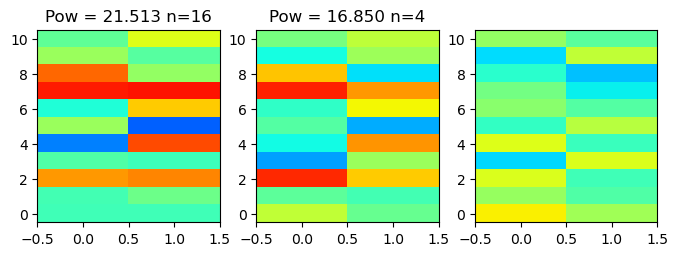

----------------------- ASE ---------------------


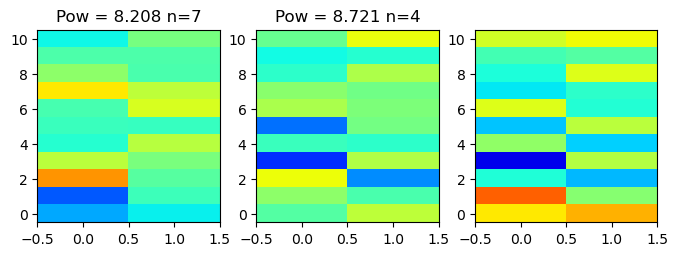

----------------------- AUP ---------------------


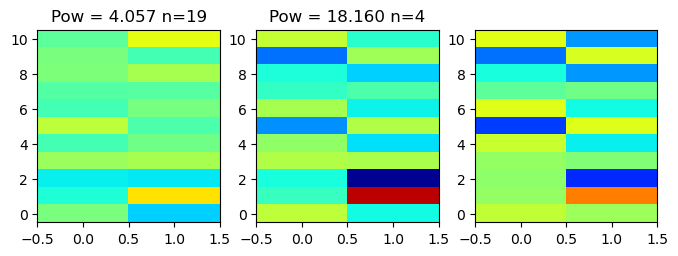

----------------------- BEL ---------------------


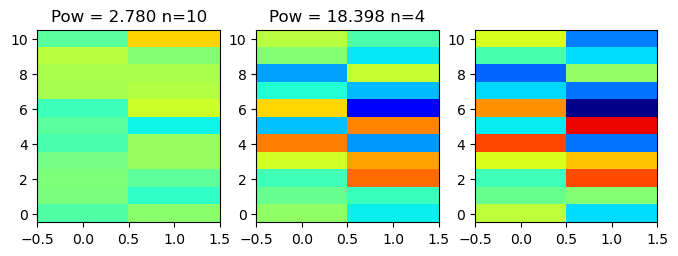

----------------------- BEV ---------------------


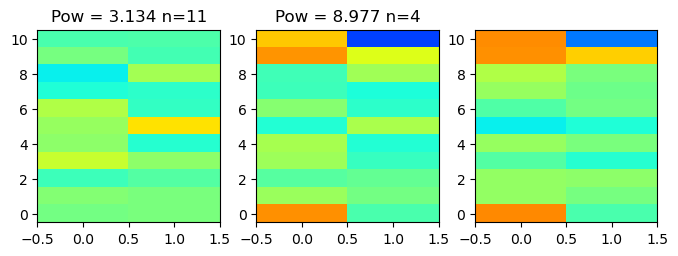

----------------------- CAA ---------------------


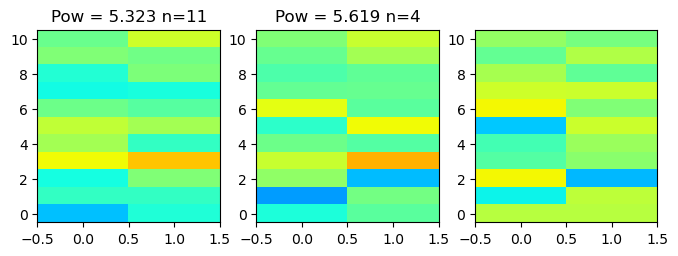

----------------------- CAE ---------------------


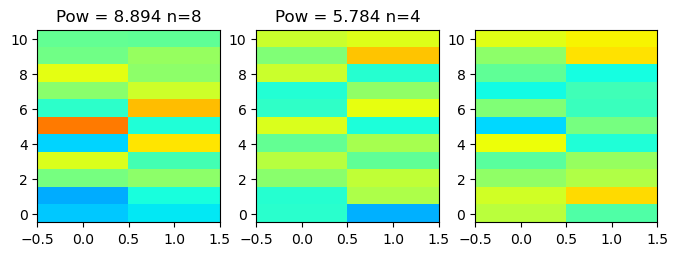

----------------------- CHE ---------------------


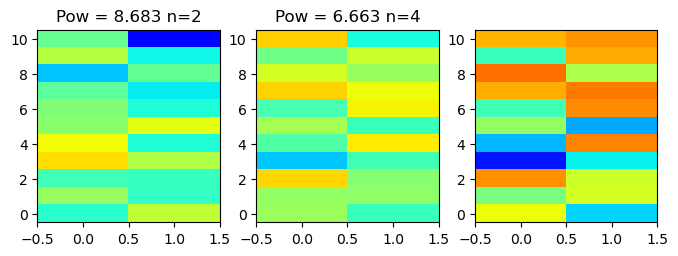

----------------------- CHM ---------------------


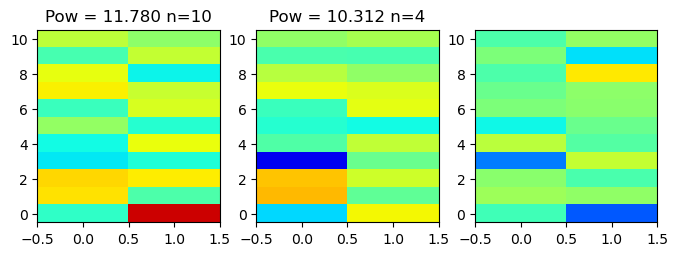

----------------------- DUH ---------------------


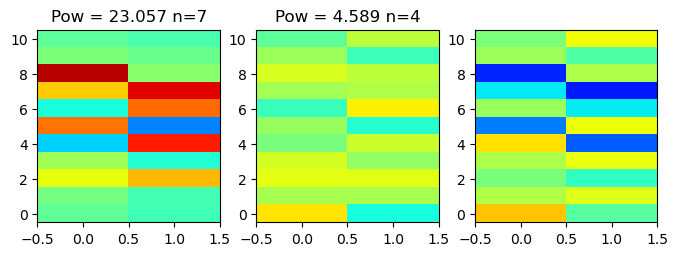

----------------------- FAE ---------------------


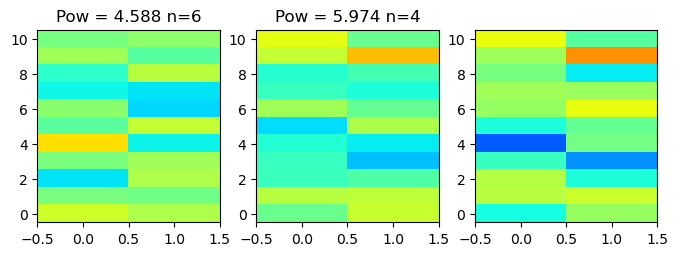

----------------------- GAP ---------------------


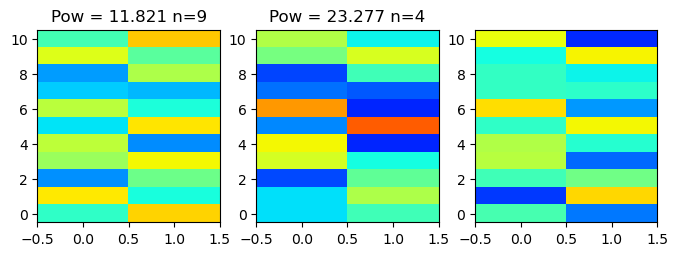

----------------------- GRG ---------------------


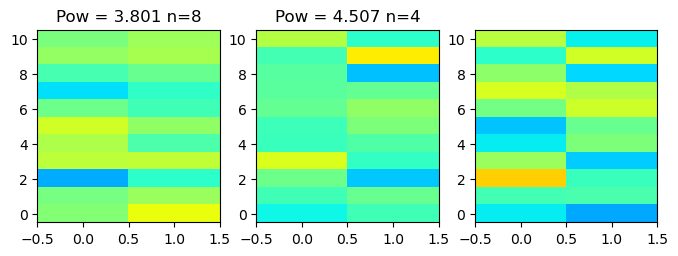

----------------------- JOL ---------------------


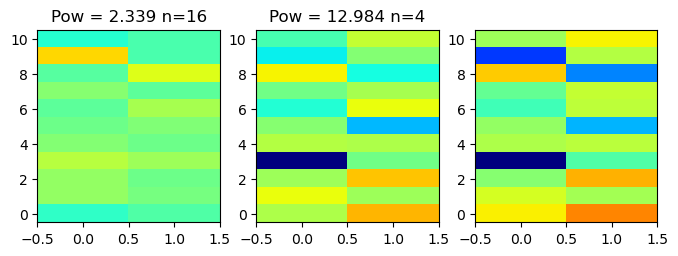

----------------------- JOM ---------------------


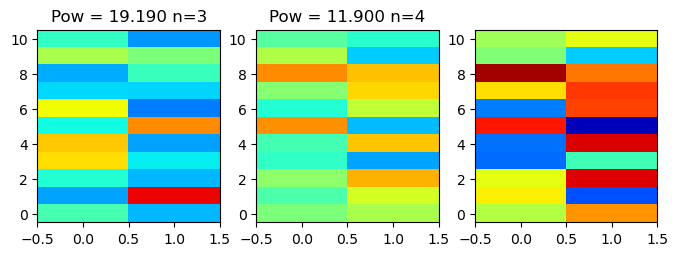

----------------------- MAJ ---------------------


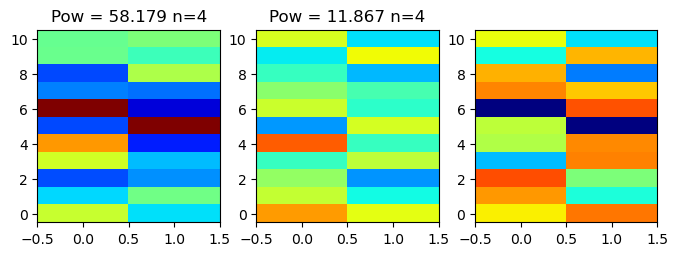

----------------------- MIS ---------------------


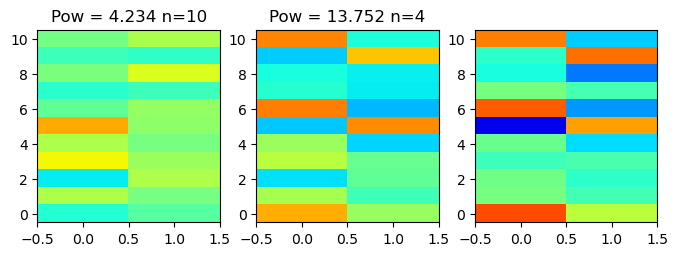

----------------------- RAP ---------------------


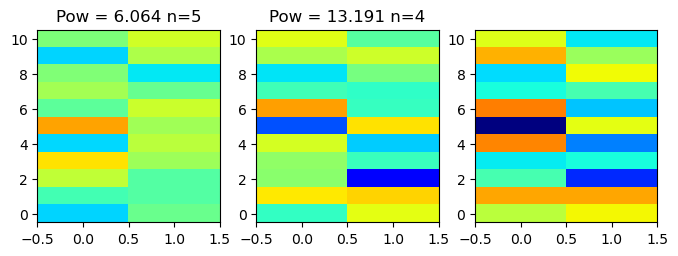

----------------------- RAR ---------------------


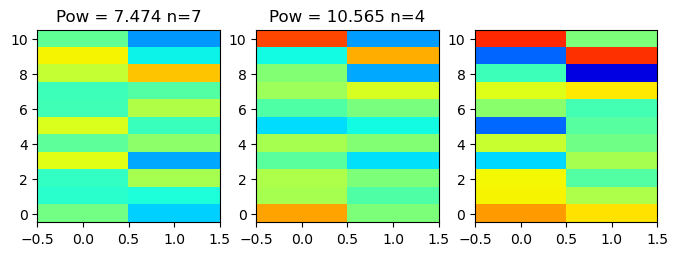

----------------------- ROM ---------------------


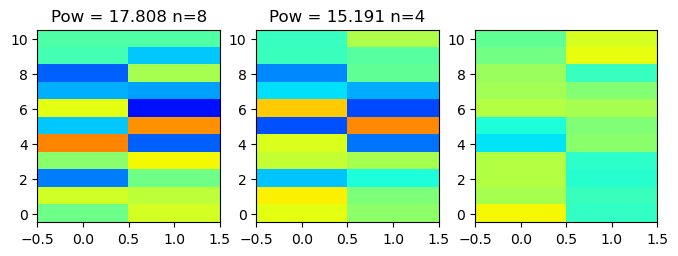

----------------------- VIC ---------------------


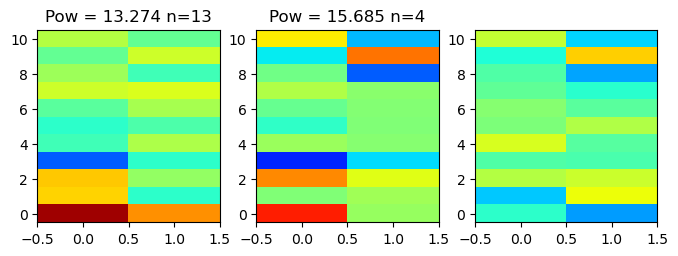

----------------------- ZEP ---------------------


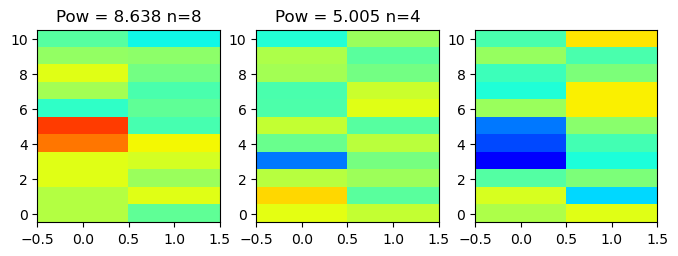

In [9]:
# Separate into bath and vax
bathInd = np.argwhere(condIDs == 'B').flatten()
vaxInd = np.argwhere(condIDs == 'D').flatten()

# Loop through babies
babies = np.unique(babyIDs)
nBabies = babies.shape[0]
nPAFs = X.shape[1]
bathPAF = np.zeros((nBabies, nPAFs))
vaxPAF = np.zeros((nBabies, nPAFs))


for ibaby, baby in enumerate(babies):
    babyInd = np.argwhere(babyIDs == baby).flatten()

    babyBathInd = np.intersect1d(babyInd, bathInd)
    meanBabyBath = np.mean(X[babyBathInd,:], axis=0)
    babyBathPAF = meanBabyBath - meanX
    bathPAF[ibaby,:] = babyBathPAF
    
    babyVaxInd = np.intersect1d(babyInd, vaxInd)
    meanBabyVax = np.mean(X[babyVaxInd,:], axis=0)
    babyVaxPAF = meanBabyVax - meanX
    vaxPAF[ibaby,:] = babyVaxPAF
    
    print('-----------------------', baby, '---------------------')
    plt.figure(figsize=(8,2.5))
    plt.clf()
    cmap = plt.get_cmap('jet')
    plt.subplot(1,3,1)
    PAF1 = np.reshape(babyBathPAF, (11,2))
    plt.imshow(PAF1, interpolation='nearest', aspect='auto', origin='lower', cmap=cmap)
    plt.title('Pow = %.3f n=%d' % (np.sum(PAF1**2), len(babyBathInd)))
    plt.clim(-2.5, 2.5)
    plt.subplot(1,3,2)
    PAF2 = np.reshape(babyVaxPAF, (11,2))
    plt.imshow(PAF2, interpolation='nearest', aspect='auto', origin='lower', cmap=cmap)
    plt.title('Pow = %.3f n=%d' % (np.sum(PAF2**2), len(babyVaxInd)))
    plt.clim(-2.5, 2.5)
    plt.subplot(1,3,3)
    plt.imshow(PAF2-PAF1, interpolation='nearest', aspect='auto', origin='lower', cmap=cmap)
    plt.clim(-2.5, 2.5)
    
    
    if (baby == 'ASE'):
        plt.savefig('/Users/frederictheunissen/Google Drive/My Drive/PowerData/PleursBebe/ASE_PAF.eps')
    plt.show()
    

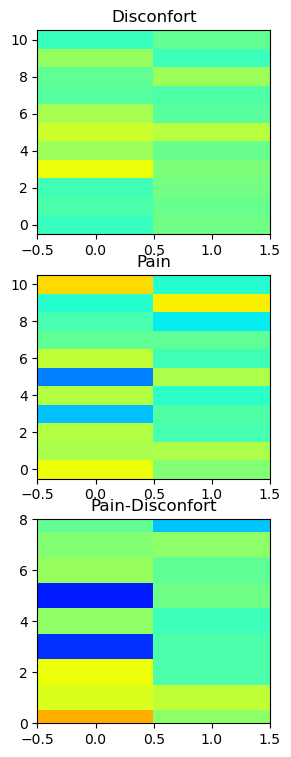

In [10]:
# Plot the average difference in MPS

fig, ax = plt.subplots(3,1, dpi = 100, figsize=(3,9))
cmap = plt.get_cmap('jet')

PAF = np.reshape(np.mean(bathPAF, axis=0), (11,2))
ax[0].imshow(PAF, aspect='auto', origin='lower', cmap=cmap, clim=(-1,1))
ax[0].set_title('Disconfort')

PAF = np.reshape(np.mean(vaxPAF, axis=0), (11,2))
ax[1].imshow(PAF, aspect='auto', origin='lower', cmap=cmap, clim=(-1,1))
ax[1].set_title('Pain')


diffPAF = np.mean(vaxPAF-bathPAF, axis = 0)
PAF = np.reshape(diffPAF, (11,2))
ax[2].imshow(PAF, aspect='auto', origin='lower', cmap=cmap, clim=(-1,1))
ax[2].set_ylim((0,8))
# plt.colorbar()
ax[2].set_title('Pain-Disconfort')

plt.savefig('/Users/frederictheunissen/Google Drive/My Drive/PowerData/PleursBebe/VaxBathPAF.eps')

In [12]:
sortInd = np.argsort(-np.abs(diffPAF))

for i in sortInd:

    print( '%.2f %s' % (diffPAF[i], XFeatureNames[i]))

-0.69 stdS
-0.65 sal
0.51 kurtT
0.45 skewT
0.45 fund
-0.36 meanT
0.28 F1
-0.27 stdT
0.23 maxfund
0.17 minfund
-0.15 meanS
-0.15 entT
-0.11 rms
-0.11 F2
0.07 kurtS
-0.06 entS
-0.06 q3
0.05 maxAmp
0.04 q2
0.04 cvfund
-0.03 skewS
0.02 q1


In [13]:
# Do a PCA along the dimension corresponding to variance within bathMPS
pcaBath = PCA(n_components=2)
bathPAF_PC12 = pcaBath.fit_transform(bathPAF) 
vaxPAF_PC12 = pcaBath.transform(vaxPAF)

print ('Bath PC Variance explained is %.2f%%' % (sum(pcaBath.explained_variance_ratio_)*100.0))

# Find the coefficients along the difference between the two groups
bathPAF_DFA1 = np.dot(bathPAF, diffPAF)
vaxPAF_DFA1 = np.dot(vaxPAF, diffPAF)


Bath PC Variance explained is 66.78%


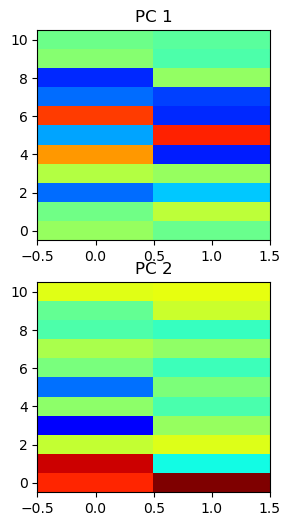

In [15]:
# Display the  first two PCAs

fig, ax = plt.subplots(2,1, dpi = 100, figsize=(3,6))
cmap = plt.get_cmap('jet')
flipval = [1, 1]
for ipc in range(2):
    PFA = np.reshape(pcaBath.components_[ipc]*flipval[ipc], (11, 2))
    ax[ipc].imshow(PFA, aspect='auto', origin='lower', cmap=cmap, clim=(-0.5,0.5))
    ax[ipc].set_title('PC %d' % (ipc+1))

plt.savefig('/Users/frederictheunissen/Google Drive/My Drive/PowerData/PleursBebe/BathPAFPC1_2.eps')



In [17]:
for iPC in range(2):
    print('-------------- PC %d --------------------' % iPC)
    sortInd = np.argsort(-np.abs(pcaBath.components_[iPC]))
    for i in sortInd:
        print( '%.2f %s' % (pcaBath.components_[iPC][i], XFeatureNames[i]))


-------------- PC 0 --------------------
0.37 skewS
0.35 kurtS
-0.35 meanS
-0.33 q3
-0.33 entS
-0.31 q2
-0.27 q1
-0.27 F1
0.25 maxAmp
-0.21 stdS
-0.18 F2
0.08 minfund
0.07 sal
-0.06 skewT
-0.04 entT
0.03 fund
0.03 rms
0.03 meanT
-0.02 cvfund
-0.02 kurtT
-0.01 maxfund
0.01 stdT
-------------- PC 1 --------------------
0.59 cvfund
0.43 maxfund
-0.39 sal
0.37 fund
-0.26 stdS
0.13 entT
-0.13 minfund
0.12 kurtT
0.12 F2
0.10 skewT
0.09 F1
-0.08 meanT
-0.08 entS
-0.06 meanS
0.06 q1
-0.06 q3
0.03 rms
-0.03 stdT
0.02 q2
0.02 maxAmp
0.00 skewS
-0.00 kurtS


Bath 2D Distance to Mean: 2.26 +- 0.666 (2SE)
Vax 2D Distance to Mean: 2.07 +- 0.382 (2SE)
Difference 0.19  t(21)=0.551 p=0.5875


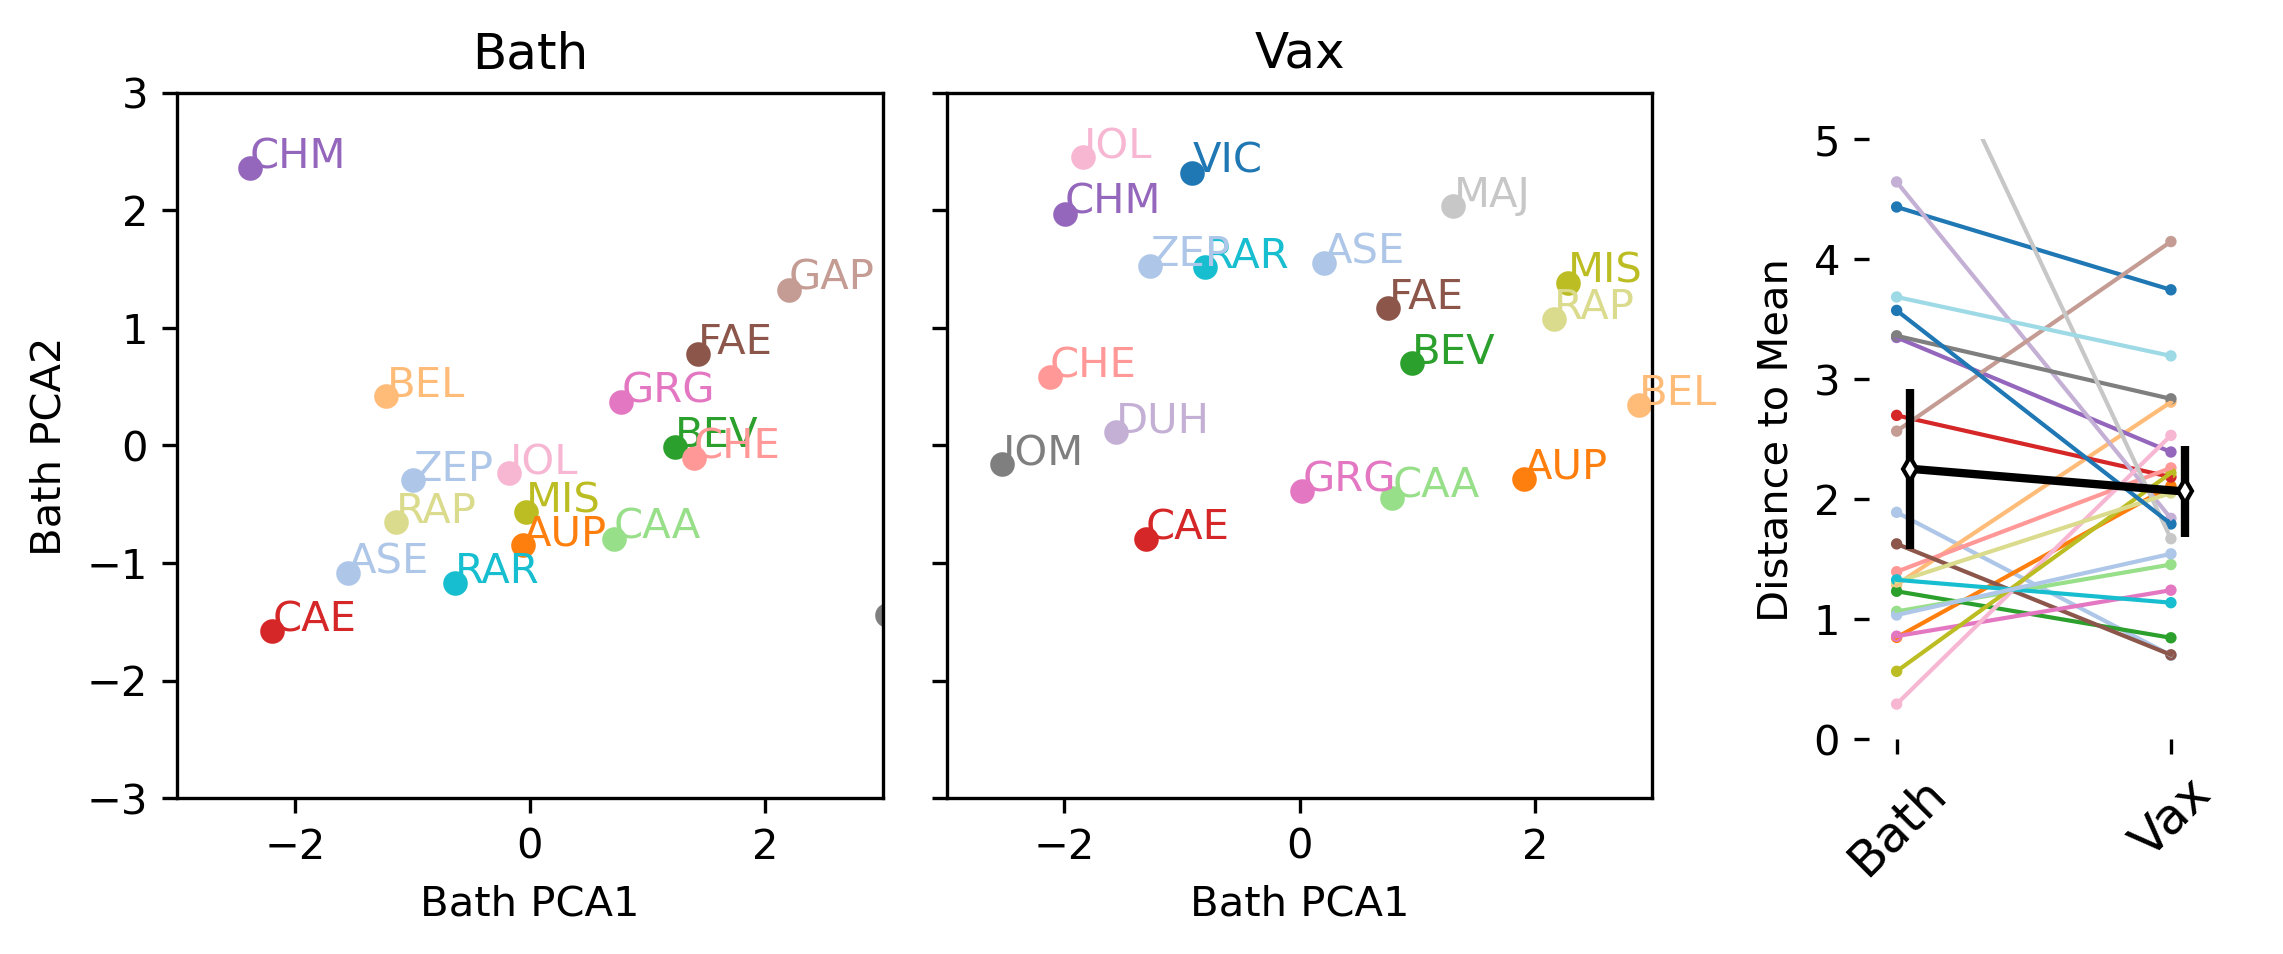

In [18]:
# Loop through babies and plot data 
babies = np.unique(babyIDs)

cmap = colormaps['tab20']

fig = plt.figure(figsize=(8,4), dpi=300)
gs = GridSpec(1, 5, figure=fig)
ax0 = fig.add_subplot(gs[0, 0:2])
ax1 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[0, 4])
colorVals = []


for ibaby, baby in enumerate(babies):
    
    ax0.scatter(bathPAF_PC12[ibaby,0], bathPAF_PC12[ibaby,1],
              s = 24,
              color=cmap.colors[ibaby%20])
    ax0.annotate(baby, (bathPAF_PC12[ibaby,0], bathPAF_PC12[ibaby,1]), color=cmap.colors[ibaby%20])
    colorVals.append(cmap.colors[ibaby%20])
    ax0.set_xlabel('Bath PCA1')
    ax0.set_ylabel('Bath PCA2')
    ax0.set_xlim((-3,3))
    ax0.set_ylim((-3,3))
    ax0.set_aspect('equal')
    ax0.set_title('Bath')
    
    ax1.scatter(vaxPAF_PC12[ibaby,0], vaxPAF_PC12[ibaby,1],
              s = 24,
              color=cmap.colors[ibaby%20])
    ax1.annotate(baby, (vaxPAF_PC12[ibaby,0], vaxPAF_PC12[ibaby,1]), color=cmap.colors[ibaby%20])
    ax1.set_xlabel('Bath PCA1')
    ax1.set_xlim((-3,3))
    ax1.set_ylim((-3,3))
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    ax1.set_title('Vax')
    # ax[1].set_ylabel('Bath PCA2')
    
# Repeat ID variance in each group for first 2 PCs
bathPAFMean = np.mean(bathPAF_PC12, axis = 0)
vaxPAFMean = np.mean(vaxPAF_PC12, axis = 0)

bathDists = []
vaxDists = []
for ibaby, baby in enumerate(babies):
    bathDists.append(np.sqrt(np.sum((bathPAF_PC12[ibaby,:]-bathPAFMean)**2)))
    vaxDists.append(np.sqrt(np.sum((vaxPAF_PC12[ibaby,:]-vaxPAFMean)**2)))

print("Bath 2D Distance to Mean: %.2f +- %.3f (2SE)" % (np.mean(bathDists), 2.0*np.std(bathDists)/np.sqrt(nBabies)))
print("Vax 2D Distance to Mean: %.2f +- %.3f (2SE)" % (np.mean(vaxDists), 2.0*np.std(vaxDists)/np.sqrt(nBabies)))
ttestResult = ttest_1samp(np.array(bathDists)-np.array(vaxDists), 0.0)
print("Difference %.2f  t(%d)=%.3f p=%.4f" % (np.mean(bathDists)- np.mean(vaxDists), 
                                                          len(bathDists)-1,
                                                          ttestResult.statistic,
                                                          ttestResult.pvalue) )

scores_1 = bathDists
scores_2 = vaxDists
    
mean_1 = np.mean(scores_1)
mean_2 = np.mean(scores_2)

sem_1 = np.std(scores_1) / np.sqrt(len(scores_1))
sem_2 = np.std(scores_2) / np.sqrt(len(scores_2))

for ibaby, baby in enumerate(babies):
    ax3.plot([0, 1], np.array([scores_1[ibaby], scores_2[ibaby]]), alpha=1, linewidth=1, color=colorVals[ibaby])

    ax3.scatter(0, scores_1[ibaby], s=3, linewidth=1, alpha=1, facecolor="none", edgecolor=colorVals[ibaby])
    ax3.scatter(1, scores_2[ibaby], s=3, linewidth=1, alpha=1, facecolor="none", edgecolor=colorVals[ibaby])

ax3.errorbar(
    [0.05, 1.05], 
    [mean_1, mean_2], 
    2 * np.array([sem_1, sem_2]),
    linewidth=2, markersize=4, markerfacecolor="white", color='black', marker="d")

ax3.set_ylabel('Distance to Mean')
ax3.set_xticks(
        [0, 1],
        ["Bath", "Vax"],
        rotation=45,
        fontsize=12)

ax3.set_frame_on(False)
ax3.set_xlim((-0.1, 1.3))
ax3.set_ylim((0, 5))
ax3.set_position(Bbox([[0.83, 0.25], [0.99, 0.75]]))
#ax3.set_position([0.84, 0.2, 0.2, 0.58])
#ax3s.margins(0.5, 0.5)

plt.savefig('/Users/frederictheunissen/Google Drive/My Drive/PowerData/PleursBebe/BathVaxBathPAFPCA.eps')

plt.show()

In [19]:
# PCA along the dimension corresponding to variance within VaxMPS
pcaVax = PCA(n_components=2)
vaxPAF_PC12Vax = pcaVax.fit_transform(vaxPAF) 
bathPAF_PC12Vax = pcaVax.transform(bathPAF)


Bath 2D Distance to Mean: 2.02 +- 0.621 (2SE)
Vax 2D Distance to Mean: 2.20 +- 0.425 (2SE)
Difference -0.17  t(21)=-0.551 p=0.5877


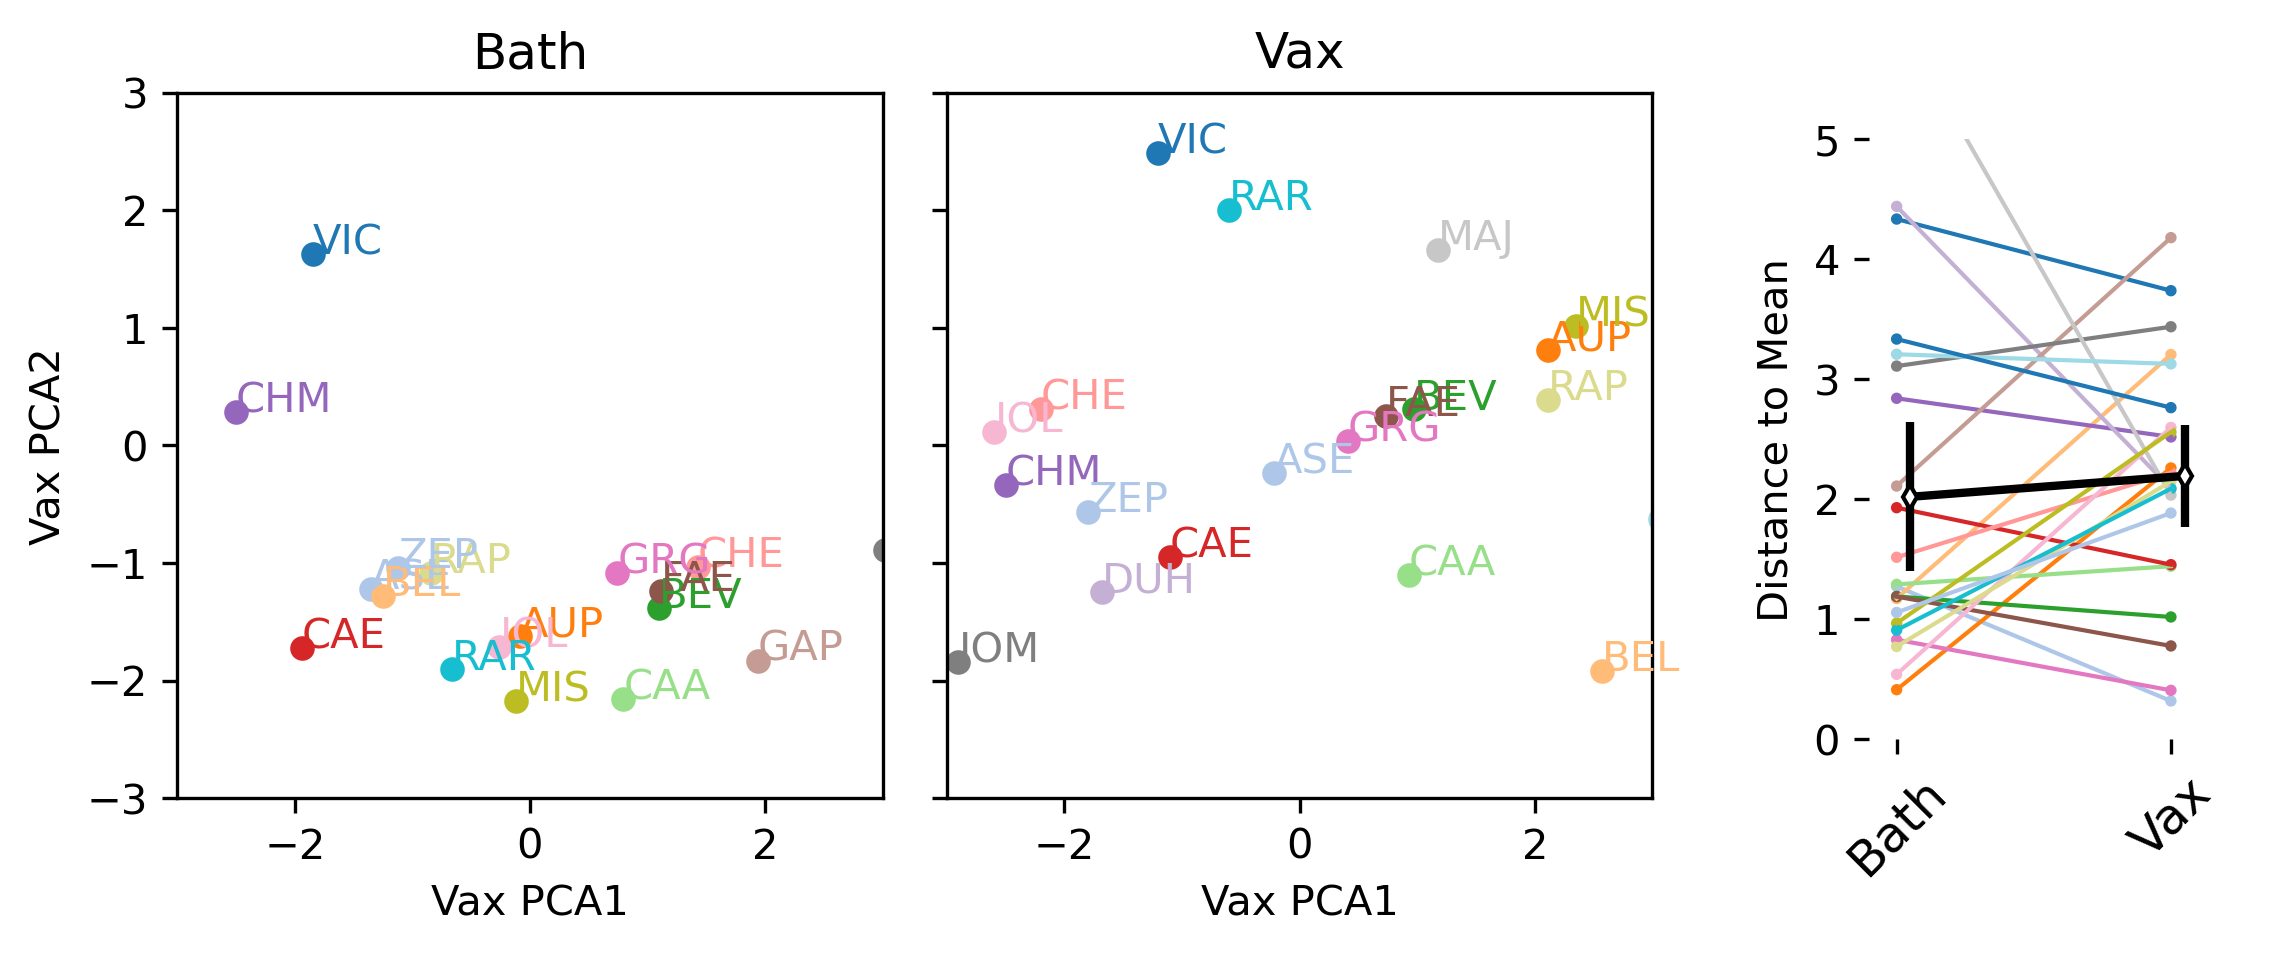

In [20]:
# Repeat with vaxPCs
babies = np.unique(babyIDs)

cmap = colormaps['tab20']

fig = plt.figure(figsize=(8,4), dpi=300)
gs = GridSpec(1, 5, figure=fig)
ax0 = fig.add_subplot(gs[0, 0:2])
ax1 = fig.add_subplot(gs[0, 2:4])
ax3 = fig.add_subplot(gs[0, 4])



for ibaby, baby in enumerate(babies):
    
    ax0.scatter(bathPAF_PC12Vax[ibaby,0], bathPAF_PC12Vax[ibaby,1],
              s = 24,
              color=cmap.colors[ibaby%20])
    ax0.annotate(baby, (bathPAF_PC12Vax[ibaby,0], bathPAF_PC12Vax[ibaby,1]), color=cmap.colors[ibaby%20])
    ax0.set_xlabel('Vax PCA1')
    ax0.set_ylabel('Vax PCA2')
    ax0.set_xlim((-3,3))
    ax0.set_ylim((-3,3))
    ax0.set_aspect('equal')
    ax0.set_title('Bath')
    
    ax1.scatter(vaxPAF_PC12Vax[ibaby,0], vaxPAF_PC12Vax[ibaby,1],
              s = 24,
              color=cmap.colors[ibaby%20])
    ax1.annotate(baby, (vaxPAF_PC12Vax[ibaby,0], vaxPAF_PC12Vax[ibaby,1]), color=cmap.colors[ibaby%20])
    ax1.set_xlabel('Vax PCA1')
    ax1.set_xlim((-3,3))
    ax1.set_ylim((-3,3))
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    ax1.set_title('Vax')
    # ax[1].set_ylabel('Bath PCA2')
    
# Repeat ID variance in each group for first 2 PCs
bathPAFMeanVax = np.mean(bathPAF_PC12Vax, axis = 0)
vaxPAFMeanVax = np.mean(vaxPAF_PC12Vax, axis = 0)

bathDists = []
vaxDists = []
for ibaby, baby in enumerate(babies):
    bathDists.append(np.sqrt(np.sum((bathPAF_PC12Vax[ibaby,:]-bathPAFMeanVax)**2)))
    vaxDists.append(np.sqrt(np.sum((vaxPAF_PC12Vax[ibaby,:]-vaxPAFMeanVax)**2)))

print("Bath 2D Distance to Mean: %.2f +- %.3f (2SE)" % (np.mean(bathDists), 2.0*np.std(bathDists)/np.sqrt(nBabies)))
print("Vax 2D Distance to Mean: %.2f +- %.3f (2SE)" % (np.mean(vaxDists), 2.0*np.std(vaxDists)/np.sqrt(nBabies)))
ttestResult = ttest_1samp(np.array(bathDists)-np.array(vaxDists), 0.0)
print("Difference %.2f  t(%d)=%.3f p=%.4f" % (np.mean(bathDists)- np.mean(vaxDists), 
                                                          len(bathDists)-1,
                                                          ttestResult.statistic,
                                                          ttestResult.pvalue) )

scores_1 = bathDists
scores_2 = vaxDists
    
mean_1 = np.mean(scores_1)
mean_2 = np.mean(scores_2)

sem_1 = np.std(scores_1) / np.sqrt(len(scores_1))
sem_2 = np.std(scores_2) / np.sqrt(len(scores_2))

for ibaby, baby in enumerate(babies):
    ax3.plot([0, 1], np.array([scores_1[ibaby], scores_2[ibaby]]), alpha=1, linewidth=1, color=colorVals[ibaby])

    ax3.scatter(0, scores_1[ibaby], s=3, linewidth=1, alpha=1, facecolor="none", edgecolor=colorVals[ibaby])
    ax3.scatter(1, scores_2[ibaby], s=3, linewidth=1, alpha=1, facecolor="none", edgecolor=colorVals[ibaby])

ax3.errorbar(
    [0.05, 1.05], 
    [mean_1, mean_2], 
    2 * np.array([sem_1, sem_2]),
    linewidth=2, markersize=4, markerfacecolor="white", color='black', marker="d")



ax3.set_ylabel('Distance to Mean')
ax3.set_xticks(
        [0, 1],
        ["Bath", "Vax"],
        rotation=45,
        fontsize=12)

ax3.set_frame_on(False)
ax3.set_xlim((-0.1, 1.3))
ax3.set_ylim((0, 5))
ax3.set_position(Bbox([[0.83, 0.25], [0.99, 0.75]]))
#ax3.set_position([0.84, 0.2, 0.2, 0.58])
#ax3s.margins(0.5, 0.5)
  
plt.savefig('/Users/frederictheunissen/Google Drive/My Drive/PowerData/PleursBebe/BathVaxVaxPAFPCA.eps')

plt.show() 

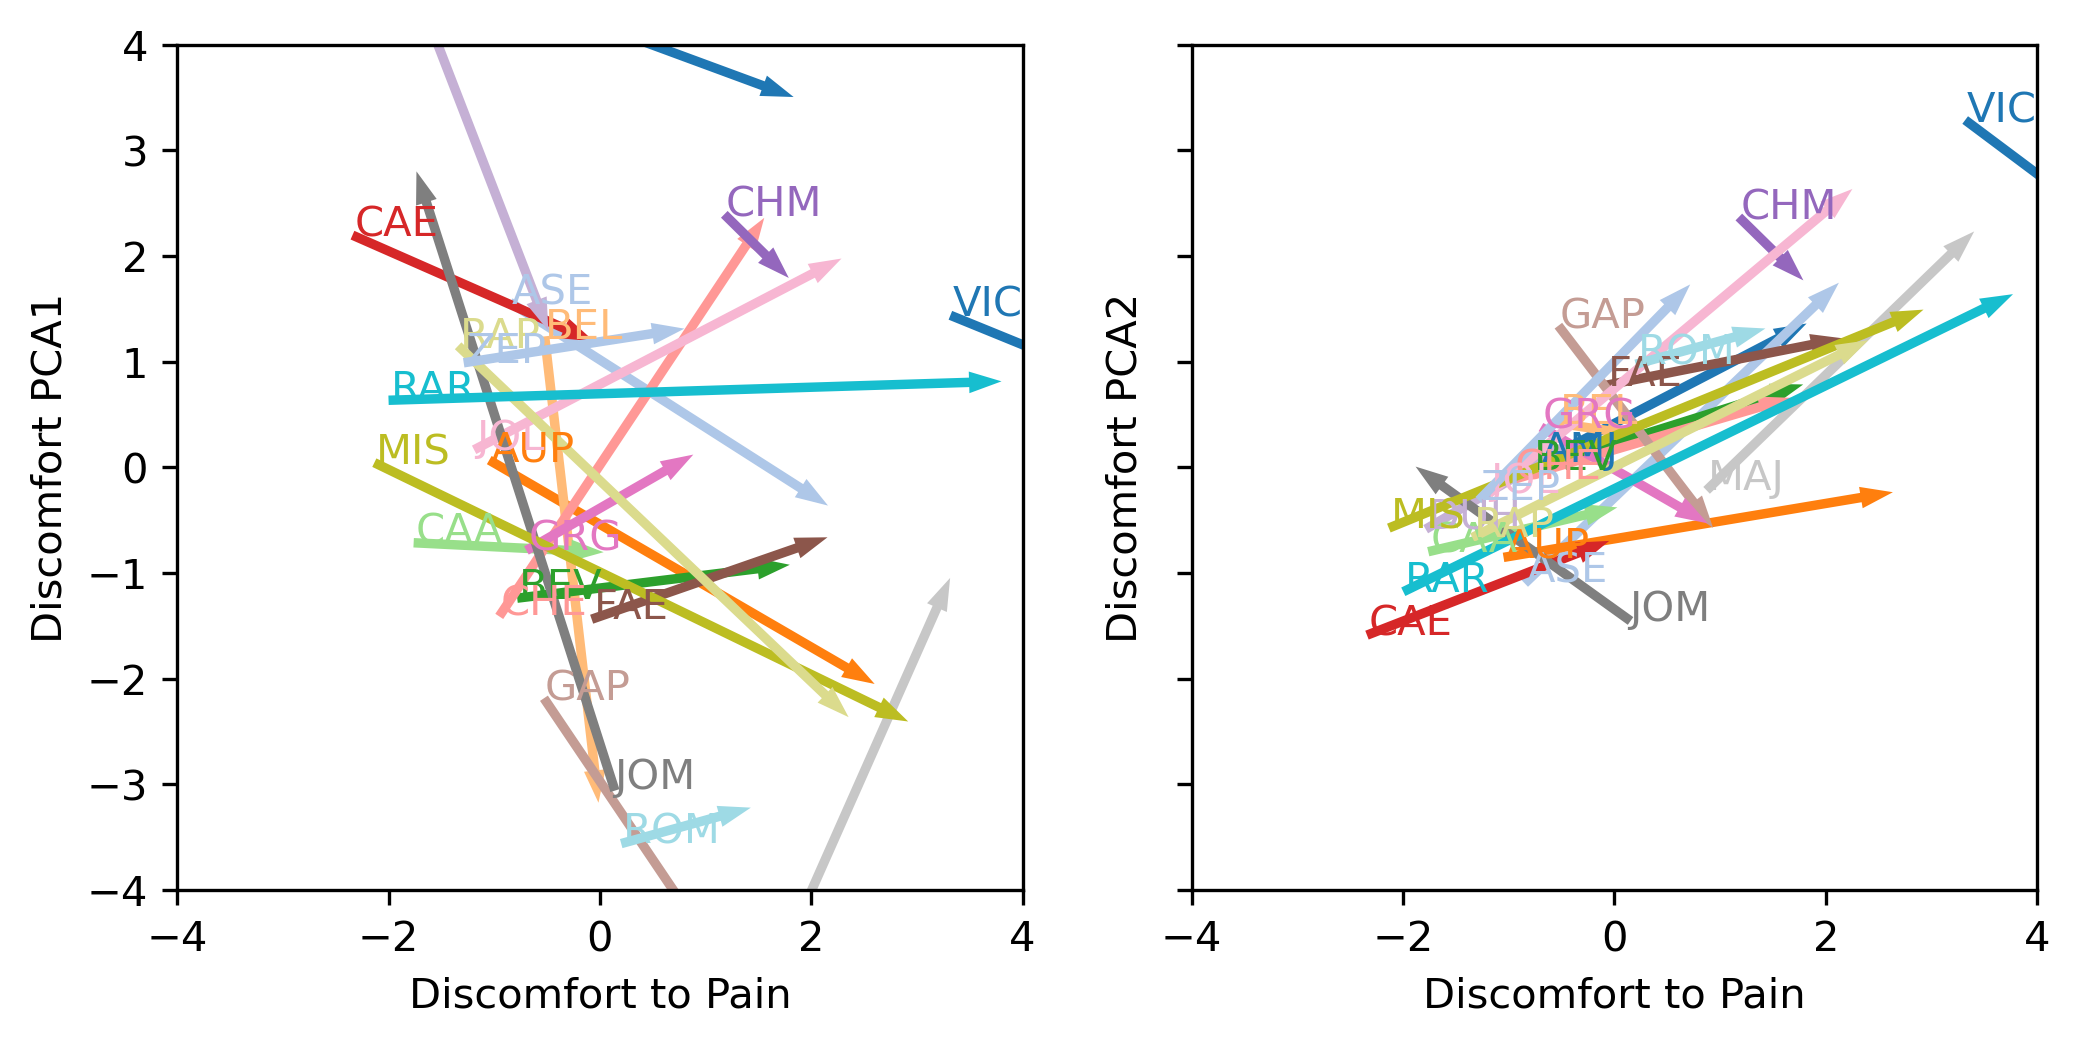

In [21]:
# Loop through babies
babies = np.unique(babyIDs)

cmap = colormaps['tab20']
fig, ax = plt.subplots(1,2, figsize=(8,4), dpi=300 )

for ibaby, baby in enumerate(babies):
    
    ax[0].arrow(bathPAF_DFA1[ibaby], -bathPAF_PC12[ibaby,0],
              vaxPAF_DFA1[ibaby]-bathPAF_DFA1[ibaby], -vaxPAF_PC12[ibaby,0] + bathPAF_PC12[ibaby,0],
              width = 0.05,
              color=cmap.colors[ibaby%20])
    ax[0].annotate(baby, (bathPAF_DFA1[ibaby], -bathPAF_PC12[ibaby,0]), color=cmap.colors[ibaby%20])
    ax[0].set_xlabel('Discomfort to Pain')
    ax[0].set_ylabel('Discomfort PCA1')
    ax[0].set_xlim((-4,4))
    ax[0].set_ylim((-4,4))
    ax[0].set_aspect('equal')
    
    ax[1].arrow(bathPAF_DFA1[ibaby], bathPAF_PC12[ibaby,1],
              vaxPAF_DFA1[ibaby]-bathPAF_DFA1[ibaby], vaxPAF_PC12[ibaby,1] - bathPAF_PC12[ibaby,1],
              width = 0.05,
              color=cmap.colors[ibaby%20])
    ax[1].annotate(baby, (bathPAF_DFA1[ibaby], bathPAF_PC12[ibaby,1]), color=cmap.colors[ibaby%20])
    ax[1].set_xlabel('Discomfort to Pain')
    ax[1].set_ylabel('Discomfort PCA2')
    ax[1].set_xlim((-4,4))
    ax[1].set_ylim((-4,4))
    ax[1].set_yticklabels([])
    ax[1].set_aspect('equal')
    

plt.savefig('/Users/frederictheunissen/Google Drive/My Drive/PowerData/PleursBebe/BathPCA_Bath2VaxDFAPAF.eps')
plt.show()

In [22]:
# Print some statistics for PC1
rPCADFABath = pearsonr(bathPAF_DFA1, -bathPAF_PC12[:,0])
print('PCA1-(Bath2Vax) for Bath values: r=%.3f p=%.4g' % (rPCADFABath.statistic, rPCADFABath.pvalue))
rPCADFAVax = pearsonr(vaxPAF_DFA1, -vaxPAF_PC12[:,0])
print('PCA1-(Bath2Vax) for Vax values: r=%.3f p=%.4g' % (rPCADFAVax.statistic, rPCADFAVax.pvalue))
rPCADFADiff = pearsonr(vaxPAF_DFA1-bathPAF_DFA1, -vaxPAF_PC12[:,0] + bathPAF_PC12[:,0])
print('PCA1-(Bath2Vax) for diff values: r=%.3f p=%.4g' % (rPCADFADiff.statistic, rPCADFADiff.pvalue))
print('Exact Fisher test with Sample size %d' % bathPAF_DFA1.shape[0])

PCA1-(Bath2Vax) for Bath values: r=-0.246 p=0.2689
PCA1-(Bath2Vax) for Vax values: r=-0.121 p=0.5915
PCA1-(Bath2Vax) for diff values: r=-0.261 p=0.2416
Exact Fisher test with Sample size 22


In [23]:
# Print some statistics for PC2
rPCADFABath = pearsonr(bathPAF_DFA1, bathPAF_PC12[:,1])
print('PCA2-(Bath2Vax) for Bath values: r=%.3f p=%.4g' % (rPCADFABath.statistic, rPCADFABath.pvalue))
rPCADFAVax = pearsonr(vaxPAF_DFA1, vaxPAF_PC12[:,1])
print('PCA2-(Bath2Vax) for Vax values: r=%.3f p=%.4g' % (rPCADFAVax.statistic, rPCADFAVax.pvalue))
rPCADFADiff = pearsonr(vaxPAF_DFA1-bathPAF_DFA1, vaxPAF_PC12[:,1] - bathPAF_PC12[:,1])
print('PCA2-(Bath2Vax) for diff values: r=%.3f p=%.4g' % (rPCADFADiff.statistic, rPCADFADiff.pvalue))
print('Exact Fisher test with Sample size %d' % bathPAF_DFA1.shape[0])

PCA2-(Bath2Vax) for Bath values: r=0.798 p=8.617e-06
PCA2-(Bath2Vax) for Vax values: r=0.702 p=0.0002714
PCA2-(Bath2Vax) for diff values: r=0.545 p=0.008678
Exact Fisher test with Sample size 22


In [45]:

vaxBathPC2Dist = []
for ibaby, baby in enumerate(babies):
    vaxBathPC2Dist.append(np.sum((vaxPAF_PC12Vax[ibaby,1]- bathPAF_PC12Vax[ibaby,1])))

ttestResult = ttest_1samp(np.array(vaxBathPC2Dist), 0.0)
print("Difference %.2f  t(%d)=%.3f p=%.4f" % (np.mean(vaxBathPC2Dist), 
                                                          len(vaxBathPC2Dist)-1,
                                                          ttestResult.statistic,
                                                          ttestResult.pvalue) )

Difference 1.20  t(21)=4.740 p=0.0001


In [47]:
bathDistsPC2 = []
vaxDistsPC2 = []
for ibaby, baby in enumerate(babies):
    bathDistsPC2.append(np.sqrt(np.sum((bathPAF_PC12[ibaby,1]-bathPAFMean[1])**2)))
    vaxDistsPC2.append(np.sqrt(np.sum((vaxPAF_PC12[ibaby,1]-vaxPAFMean[1])**2)))

print("Bath 2D Distance to Mean: %.2f +- %.3f (2SE)" % (np.mean(bathDistsPC2), 2.0*np.std(bathDistsPC2)/np.sqrt(nBabies)))
print("Vax 2D Distance to Mean: %.2f +- %.3f (2SE)" % (np.mean(vaxDistsPC2), 2.0*np.std(vaxDistsPC2)/np.sqrt(nBabies)))
ttestResult = ttest_1samp(np.array(bathDistsPC2)-np.array(vaxDistsPC2), 0.0)
print("Difference %.2f  t(%d)=%.3f p=%.4f" % (np.mean(bathDistsPC2)- np.mean(vaxDistsPC2), 
                                                          len(bathDistsPC2)-1,
                                                          ttestResult.statistic,
                                                          ttestResult.pvalue) )

Bath 2D Distance to Mean: 0.87 +- 0.328 (2SE)
Vax 2D Distance to Mean: 0.84 +- 0.195 (2SE)
Difference 0.03  t(21)=0.212 p=0.8340


In [48]:
subjectPerf = []
for ibaby, baby in enumerate(babies):
    subjectPerf.append(np.mean(subjectInfo.loc[subjectInfo['assignedID'] == baby]['success_test1']))

In [49]:
distancePerf = []
dB2V = []

for ibaby, baby in enumerate(babies):
    dBath2Vax = np.sum((vaxPAF[ibaby,:] - bathPAF[ibaby])**2)
    dVax2MeanVax = np.sum((vaxPAF_PC12[ibaby,:] - vaxPAFMean)**2)
    dB2V.append(dBath2Vax*1e-4)
    distancePerf.append(dVax2MeanVax/dBath2Vax)

In [51]:
def linefit(x,y):
    # fit a linear curve an estimate its y-values and their error.
    n = len(x)
    a, b = np.polyfit(x, y, deg=1)
    
    sse = np.sum((y-(a*x+b))**2)
    xmean = np.mean(x)
    ssx = np.sum((x - xmean)**2)
    sst = np.sum((y-np.mean(y))**2)
    syx = np.sqrt(sse/(n-2))
    sy  = np.sqrt(sst/(n-1))
    r2adj = 1. - syx**2/sy**2
    fval = (sst-sse)/syx**2
    pval = 1. - f.cdf(fval, dfn=1, dfd=n-2)

    # Plot the line 
    xsel = np.linspace(x.min(), x.max(), num=100)
    
    y_est = a * xsel + b
    y_err = syx * np.sqrt(1/n + (xsel - xmean)**2 / np.sum((x - xmean)**2))
    
    return xsel, y_est, y_err, r2adj, fval, pval

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


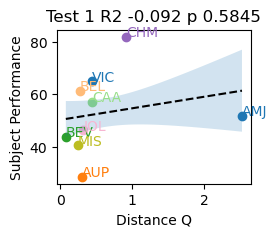

In [56]:
# Correlation avec distance acoustique

fig, ax = plt.subplots(figsize=(2.5,2), dpi = 100)
# ax.scatter(distancePerf, np.array(subjectPerf)*100.0)

for ibaby, baby in enumerate(babies):
    ax.scatter(distancePerf[ibaby], subjectPerf[ibaby]*100.0, color=cmap.colors[ibaby%20])
    ax.annotate(baby, (distancePerf[ibaby], subjectPerf[ibaby]*100.0), color=cmap.colors[ibaby%20])
    
plt.xlabel('Distance Q')
plt.ylabel('Subject Performance')

# fit a linear curve an estimate its y-values and their error without AUP.
# ind = np.argwhere(np.logical_and(np.isnan(subjectPerf)==False, babies != 'AUP')).flatten()
ind = np.argwhere(np.isnan(subjectPerf)==False).flatten()
x = np.array(distancePerf)[ind]
y = np.array(subjectPerf)[ind]*100.0

xsel, y_est, y_err, r2adj, fval, pval = linefit(x,y)

ax.plot(xsel, y_est, '--', color = 'k')
ax.fill_between(xsel, y_est - y_err, y_est + y_err, alpha=0.2)

ax.set(title='Test 1 R2 %.3f p %.4f' % ( r2adj, pval) )
plt.savefig('/Users/frederictheunissen/Google Drive/My Drive/PowerData/PleursBebe/SubjectvsDistanceTest1PAF.eps')

In [57]:
# fit a linear curve an estimate its y-values and their error without AUP.
ind = np.argwhere(np.logical_and(np.isnan(subjectPerf)==False, babies != 'AUP')).flatten()
x = np.array(distancePerf)[ind]
y = np.array(subjectPerf)[ind]
xsel, y_est, y_err, r2adj, fval, pval = linefit(x,y)
print ('Without AUP: R2 = %.3f p=%.4f' % (r2adj,pval))


Without AUP: R2 = -0.140 p=0.7208


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


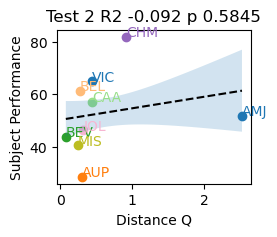

In [58]:
# Correlation avec distance acoustique pour test 2

subjectPerf = []
for ibaby, baby in enumerate(babies):
    subjectPerf.append(np.mean(subjectInfo.loc[subjectInfo['assignedID'] == baby]['success_test2']))


fig, ax = plt.subplots(figsize=(2.5,2), dpi = 100)
# ax.scatter(distancePerf, np.array(subjectPerf)*100.0)

for ibaby, baby in enumerate(babies):
    ax.scatter(distancePerf[ibaby], subjectPerf[ibaby]*100.0, color=cmap.colors[ibaby%20])
    ax.annotate(baby, (distancePerf[ibaby], subjectPerf[ibaby]*100.0), color=cmap.colors[ibaby%20])
    
plt.xlabel('Distance Q')
plt.ylabel('Subject Performance')

# fit a linear curve an estimate its y-values and their error without AUP.
# ind = np.argwhere(np.logical_and(np.isnan(subjectPerf)==False, babies != 'AUP')).flatten()
ind = np.argwhere(np.isnan(subjectPerf)==False).flatten()
x = np.array(distancePerf)[ind]
y = np.array(subjectPerf)[ind]*100.0

xsel, y_est, y_err, r2adj, fval, pval = linefit(x,y)

ax.plot(xsel, y_est, '--', color = 'k')
ax.fill_between(xsel, y_est - y_err, y_est + y_err, alpha=0.2)

ax.set(title='Test 2 R2 %.3f p %.4f' % ( r2adj, pval) )
plt.savefig('/Users/frederictheunissen/Google Drive/My Drive/PowerData/PleursBebe/SubjectvsDistanceTest2PAF.eps')

In [59]:
# fit a linear curve an estimate its y-values and their error without AUP.
ind = np.argwhere(np.logical_and(np.isnan(subjectPerf)==False, babies != 'AUP')).flatten()
x = np.array(distancePerf)[ind]
y = np.array(subjectPerf)[ind]
xsel, y_est, y_err, r2adj, fval, pval = linefit(x,y)
print ('Without AUP: R2 = %.3f p=%.4f' % (r2adj,pval))

Without AUP: R2 = -0.140 p=0.7208


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


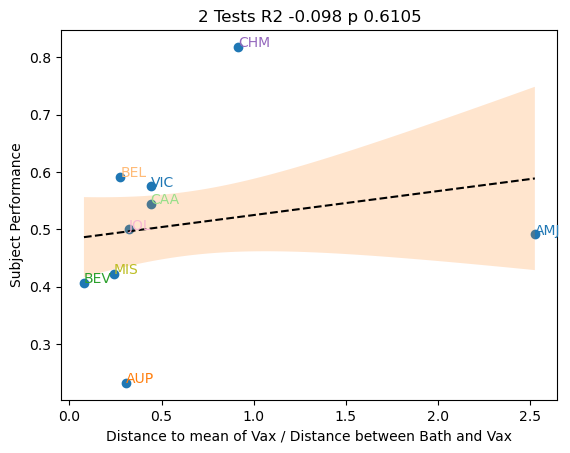

In [60]:
# Correlation avec distance acoustique pour 2 tests

subjectPerf = []
for ibaby, baby in enumerate(babies):
    subjectPerf.append(np.mean(subjectInfo.loc[subjectInfo['assignedID'] == baby]['success_2tests']))

fig, ax = plt.subplots()
ax.scatter(distancePerf, subjectPerf)

for ibaby, baby in enumerate(babies):
    ax.annotate(baby, (distancePerf[ibaby], subjectPerf[ibaby]), color=cmap.colors[ibaby%20])
    
plt.xlabel('Distance to mean of Vax / Distance between Bath and Vax')
plt.ylabel('Subject Performance')

# fit a linear curve an estimate its y-values and their error without AUP.
# ind = np.argwhere(np.logical_and(np.isnan(subjectPerf)==False, babies != 'AUP')).flatten()
ind = np.argwhere(np.isnan(subjectPerf)==False).flatten()
x = np.array(distancePerf)[ind]
y = np.array(subjectPerf)[ind]

xsel, y_est, y_err, r2adj, fval, pval = linefit(x,y)

ax.plot(xsel, y_est, '--', color = 'k')
ax.fill_between(xsel, y_est - y_err, y_est + y_err, alpha=0.2)

ax.set(title='2 Tests R2 %.3f p %.4f' % ( r2adj, pval) )
plt.savefig('/Users/frederictheunissen/Google Drive/My Drive/PowerData/PleursBebe/SubjectvsDistance2TestsPAF.eps')

In [61]:
# fit a linear curve an estimate its y-values and their error without AUP.
ind = np.argwhere(np.logical_and(np.isnan(subjectPerf)==False, babies != 'AUP')).flatten()
x = np.array(distancePerf)[ind]
y = np.array(subjectPerf)[ind]
xsel, y_est, y_err, r2adj, fval, pval = linefit(x,y)
print ('Without AUP: R2 = %.3f p=%.4f' % (r2adj,pval))

Without AUP: R2 = -0.147 p=0.7609


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


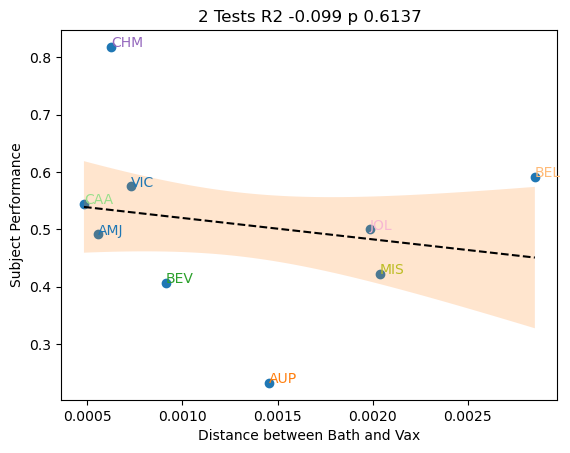

In [62]:
# Correlation avec distance acoustique pour 2 tests

subjectPerf = []
for ibaby, baby in enumerate(babies):
    subjectPerf.append(np.mean(subjectInfo.loc[subjectInfo['assignedID'] == baby]['success_2tests']))

fig, ax = plt.subplots()
ax.scatter(dB2V, subjectPerf)

for ibaby, baby in enumerate(babies):
    ax.annotate(baby, (dB2V[ibaby], subjectPerf[ibaby]), color=cmap.colors[ibaby%20])
    
plt.xlabel('Distance between Bath and Vax')
plt.ylabel('Subject Performance')

# fit a linear curve an estimate its y-values and their error without AUP.
# ind = np.argwhere(np.logical_and(np.isnan(subjectPerf)==False, babies != 'AUP')).flatten()
ind = np.argwhere(np.isnan(subjectPerf)==False).flatten()
x = np.array(dB2V)[ind]
y = np.array(subjectPerf)[ind]

xsel, y_est, y_err, r2adj, fval, pval = linefit(x,y)

ax.plot(xsel, y_est, '--', color = 'k')
ax.fill_between(xsel, y_est - y_err, y_est + y_err, alpha=0.2)

ax.set(title='2 Tests R2 %.3f p %.4f' % ( r2adj, pval) )
plt.savefig('/Users/frederictheunissen/Google Drive/My Drive/PowerData/PleursBebe/SubjectvsDistanceOnly2TestsPAF.eps')